<a href="https://colab.research.google.com/github/Zanderl1987/Data-and-Concept-Exploration/blob/master/EDA_Practice_05042020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas.util.testing as tm

plt.style.use('dark_background')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#sns.set(style='ticks')
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))


def plot_feature_scatter(df1,df2, features):
  """
  Takes two dataframes and a list of feature names as strings and creates
  subplots of scatterplots
  """

  i = 0
  # sns.set_style('whitegrid)
  plt.figure()
  fig, ax = plt.subplots(4,4,figsize=(14,14))

  for feature in features:
    i += 1
    plt.subplot(4,4,i)
    plt.scatter(df1[feature],df2[feature],marker='+')
    plt.xlabel(feature,fontsize=9)
  plt.show();

## London housing price data from Kaggle

In [0]:
dir_path = '/content/drive/My Drive/Data Science/Datasets/Kaggle Datasets/London Housing Data/'

files = os.listdir(dir_path)

m_df = pd.read_csv(os.path.join(dir_path,files[0]))
y_df = pd.read_csv(os.path.join(dir_path,files[1]))

m_df['date'] = pd.to_datetime(m_df['date'])
y_df['date'] = pd.to_datetime(y_df['date'])

#m_df.shape
#m_df.head()

In [0]:
m_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


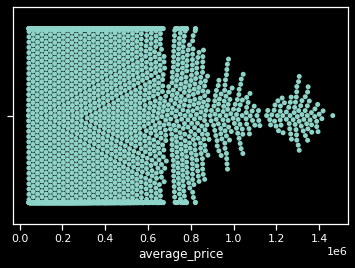

In [0]:
fig, ax = plt.subplots(figsize=(24,12))

sns.swarmplot(x=m_df['average_price'])

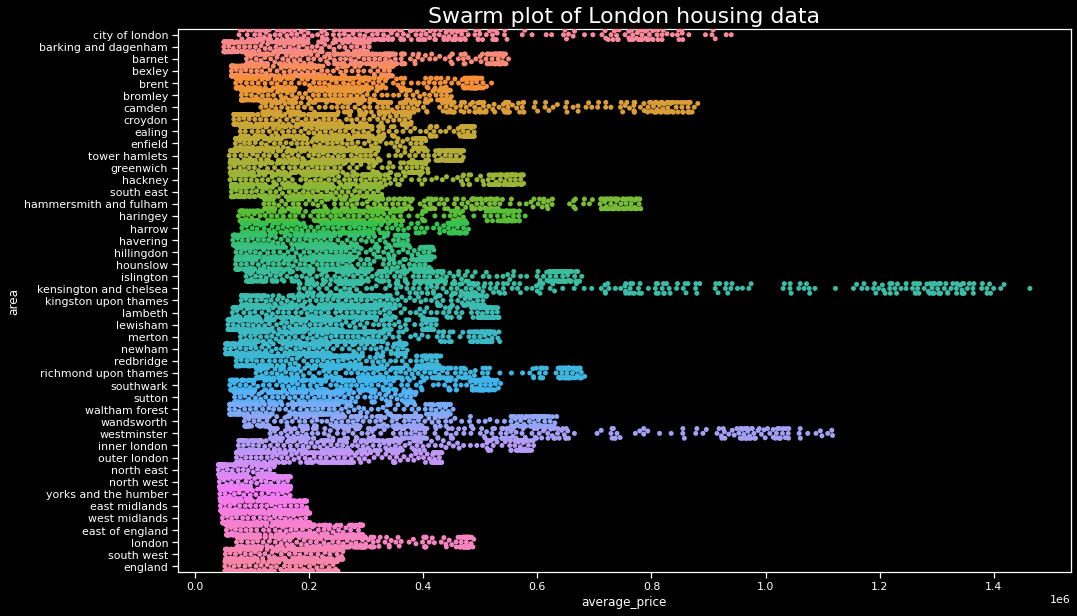

In [0]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(16,10))

sns.swarmplot(x=m_df['average_price'],y=m_df['area'],ax=ax)

ax.set_title('Swarm plot of London housing data',fontsize=22);

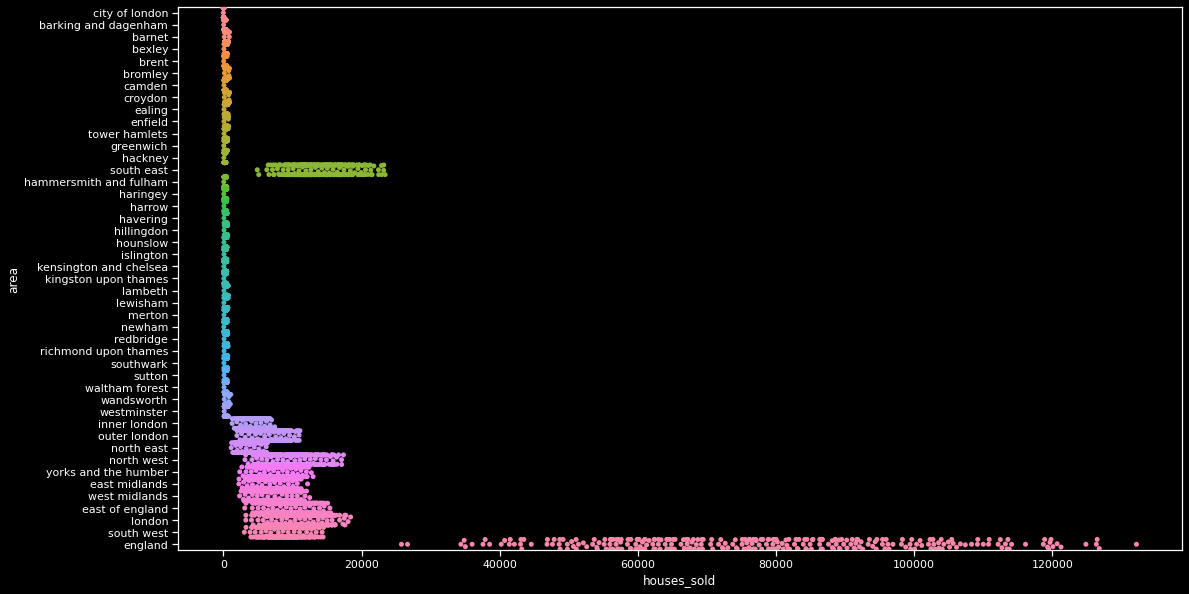

In [0]:
fig, ax = plt.subplots(figsize=(18,10))

sns.swarmplot(x=m_df['houses_sold'] ,y=m_df['area'],ax=ax)
plt.title('Houses sold');

## USA cars dataset from Kaggle

In [0]:
file_path = "/content/drive/My Drive/Data Science/Datasets/Kaggle Datasets/USA_cars_datasets.csv"
df_c = pd.read_csv(file_path)

df_c = df_c.drop(['Unnamed: 0'],axis=1)

model_unq = pd.unique(df_c['model'])
brand_unq = pd.unique(df_c['brand'])
year_unq = pd.unique(df_c['year'])
title_unq = pd.unique(df_c['title_status'])
state_unq = pd.unique(df_c['state'])
color_unq = pd.unique(df_c['color'])

df_c['full_name'] = (df_c['brand'] +' ' +df_c['model'])

df_c.shape
df_c.head()

(2499, 13)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,full_name
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,toyota cruiser
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,ford se
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,dodge mpv
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,ford door
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,chevrolet 1500


In [0]:
missing_data(df_c)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
Total,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,object,object,int64,object,float64,object,object,int64,object,object,object


Text(0.5, 1.0, 'Car prices by state')

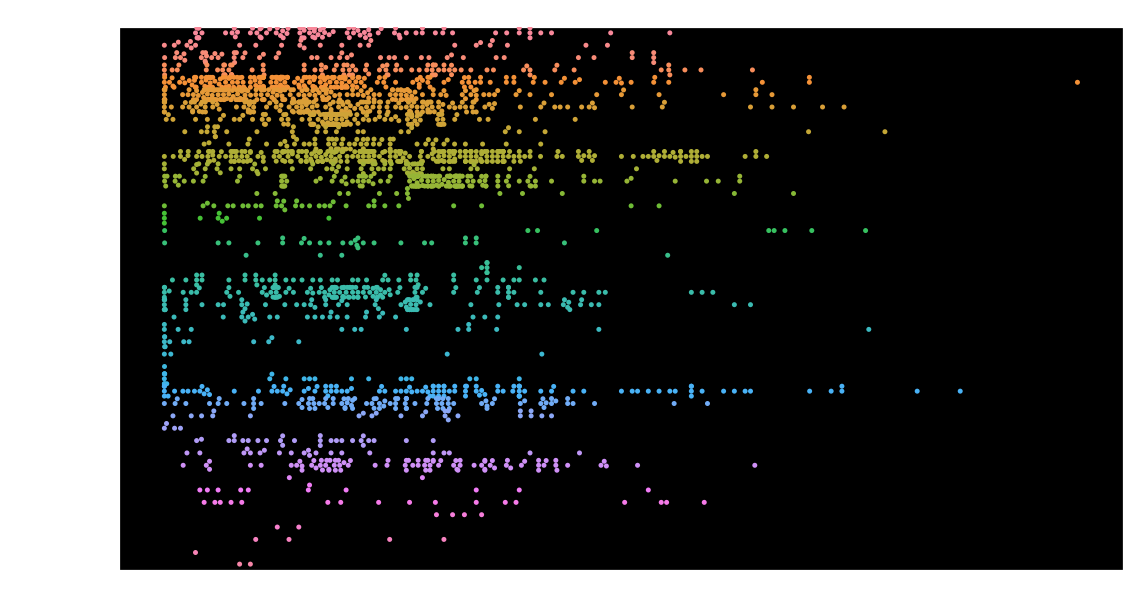

In [0]:
fig, ax = plt.subplots(figsize=(18,10))

sns.swarmplot(x=df_c['price'],y=df_c['state'],ax=ax)
ax.set_title('Car prices by state',fontsize=18)

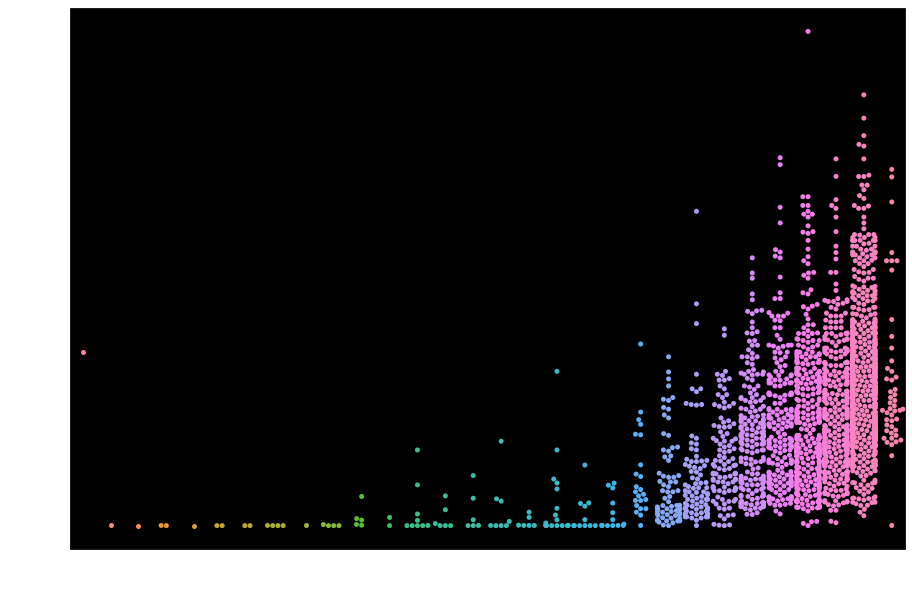

In [0]:
fig, ax = plt.subplots(figsize=(15,10))

sns.swarmplot(x=df_c['year'],y=df_c['price'],ax=ax)

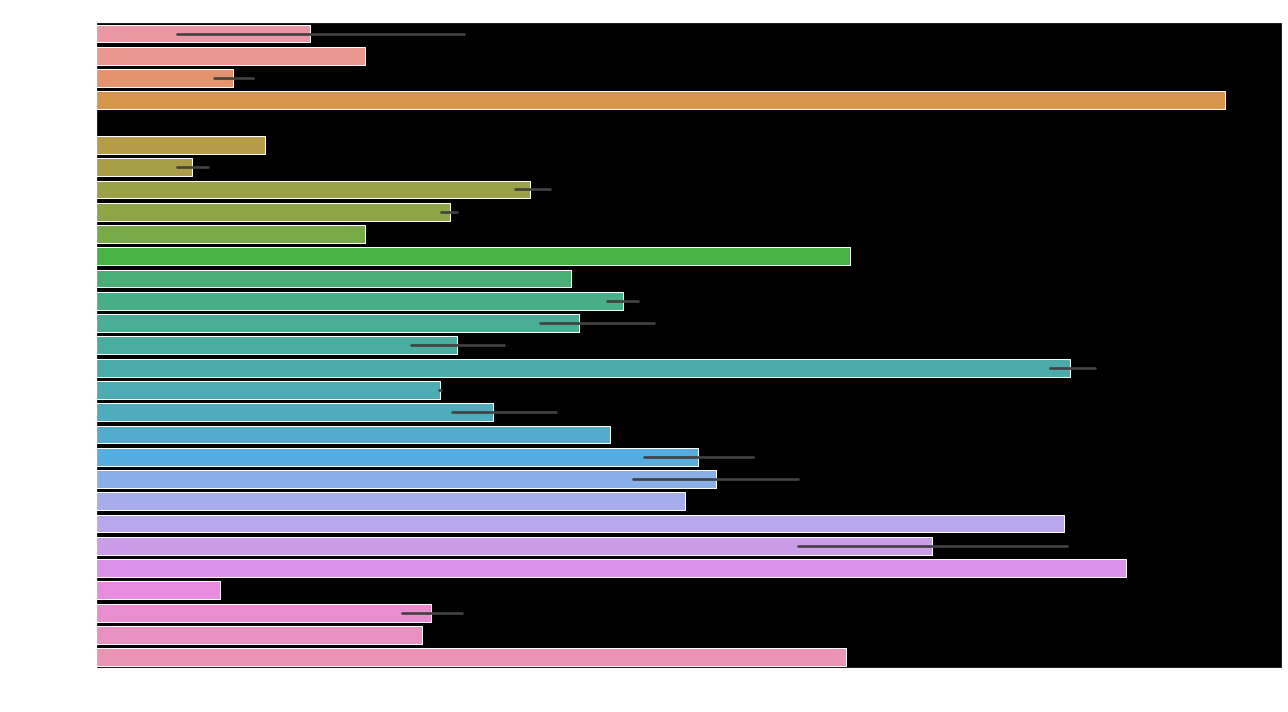

In [0]:
dir_path = "/content/drive/My Drive/Data Science/Datasets/Kaggle Datasets/"

fig, ax = plt.subplots(figsize=(15,10))

state = 'virginia'

sns.barplot(x=df_c['price'],y=df_c['model'][df_c['state'] == state],ax=ax)
ax.set_title(f"Vehicle models for the state of {state}")


plt.tight_layout() # Formats the image when it is saved off so that all contents fit within the saved version

# We can save our figure to a file using either the matplotlib approach or the object oriented approach
# the fig.savefig() approach is the object oriented approach

#plt.savefig(dir_path+'usa_cars_vehicle_models_virginia.png',dpi=300)

fig.tight_layout()
fig.savefig(dir_path+'usa_cars_vehicle_models_virginia.png',dpi=300);

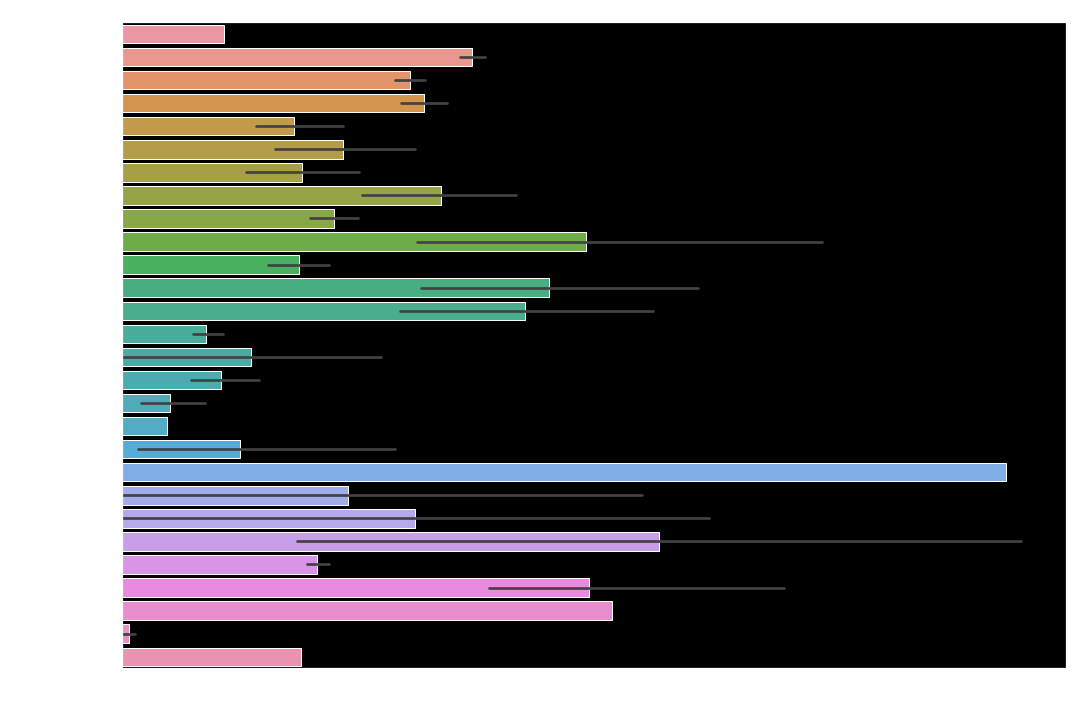

In [0]:
dir_path = "/content/drive/My Drive/Data Science/Datasets/Kaggle Datasets/"

fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(x=df_c['price'],y=df_c['brand'],ax=ax)
ax.set_title(f"Vehicle price by brand")


plt.tight_layout() # Formats the image when it is saved off so that all contents fit within the saved version

# We can save our figure to a file using either the matplotlib approach or the object oriented approach
# the fig.savefig() approach is the object oriented approach

#plt.savefig(dir_path+'usa_cars_vehicle_models_virginia.png',dpi=300)

fig.tight_layout()
fig.savefig(dir_path+'usa_cars_vehicle_price_by_brand.png',dpi=300);

In [0]:
df_c[df_c['state'] == 'virginia']

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
14,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,22 hours left
19,38100,ford,door,2013,clean vehicle,54380.0,gray,1ft8w3dt5deb68569,167753923,virginia,usa,22 hours left
24,20800,ford,door,2013,clean vehicle,105510.0,silver,1ftfw1efxdfa01008,167753937,virginia,usa,22 hours left
34,13000,ford,convertible,2003,clean vehicle,58817.0,gray,1fahp60a63y107799,167754173,virginia,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2340,19000,nissan,rogue,2018,clean vehicle,41096.0,black,jn8at2mv3jw342140,167752732,virginia,usa,21 hours left
2373,15000,nissan,rogue,2017,clean vehicle,28918.0,red,jn8at2mv7hw264732,167753299,virginia,usa,21 hours left
2375,36300,nissan,xd,2017,clean vehicle,16224.0,white,1n6ba1f46hn535299,167753308,virginia,usa,21 hours left
2377,14000,nissan,rogue,2017,clean vehicle,27790.0,green,knmat2mv8hp516090,167753310,virginia,usa,21 hours left


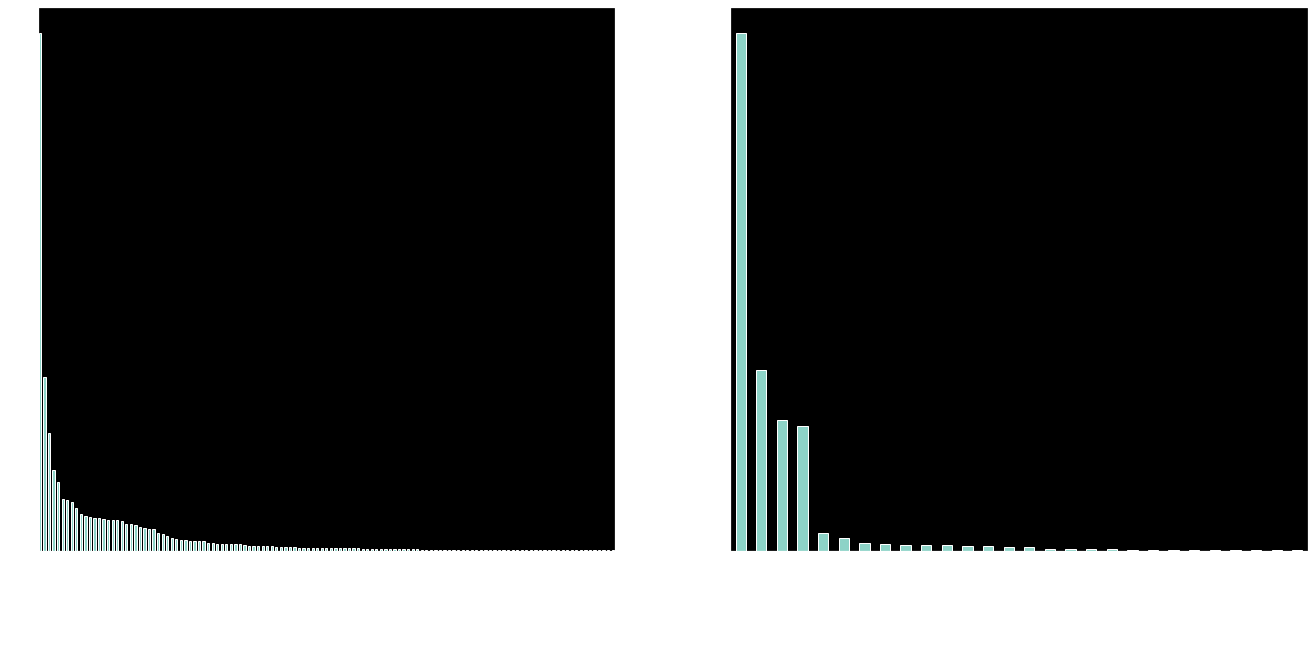

In [0]:
#plt.subplot(rows,columns,index value of current plot)

fig, ax = plt.subplots(figsize=(60,10))

plt.subplot(1,5,1)
df_c['model'].value_counts().plot(kind='bar');

plt.subplot(1,5,2)
df_c['brand'].value_counts().plot(kind='bar');

<Figure size 432x288 with 0 Axes>

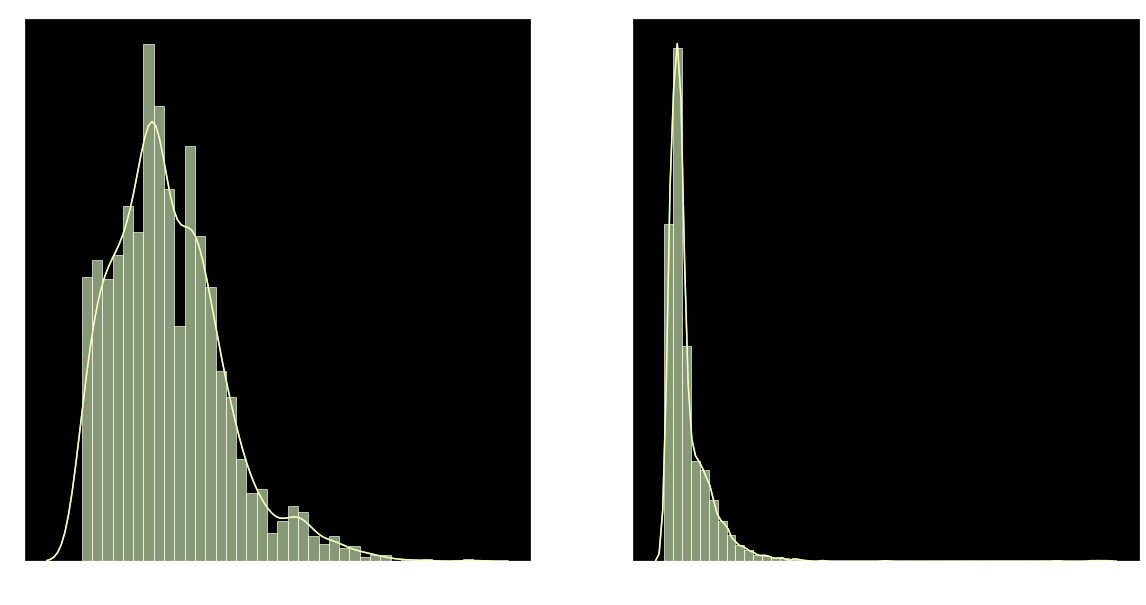

In [0]:
plt.figure()
fig, ax = plt.subplots(1,2,figsize=(20,10))
i = 0
features = ['price','mileage']

for feature in features:
  i += 1
  plt.subplot(1,2,i)
  sns.distplot(df_c[feature],hist=True,label=features[0])
  sns.distplot(df_c[feature],hist=True,label=features[1])
plt.show();

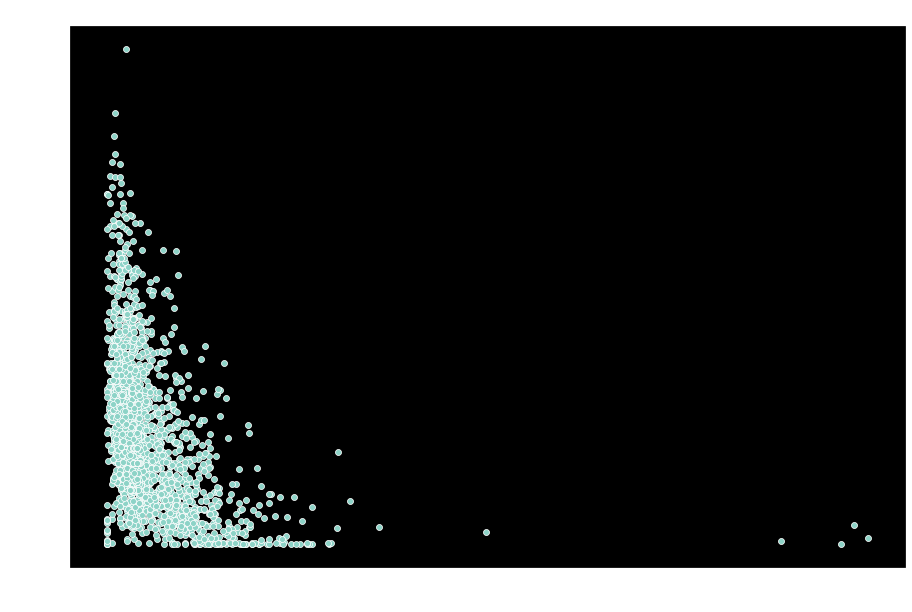

In [0]:
fig, ax = plt.subplots(figsize=(15,10))

x = df_c['mileage']
y = df_c['price']

sns.scatterplot(x=x,y=y,ax=ax)
ax.set_title('Price compared to mileage',fontsize=16);

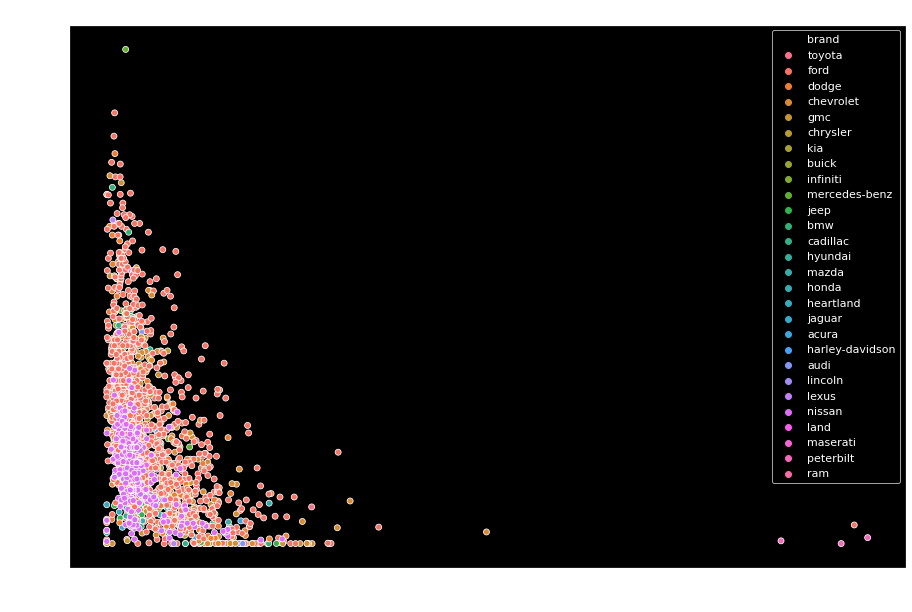

In [0]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(x=df_c['mileage'],y=df_c['price'],hue=df_c['brand'],ax=ax)
ax.set_title('Price compared to mileage',fontsize=16);

In [0]:
#sns.countplot(df_c['brand'])

In [0]:
#filt_df = df_c.loc[(df_c['brand'] == 'ford') & (df_c['model'] == 'fusion')]
filt_df = df_c.loc[(df_c['brand'] == 'ford')]
filt_df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left
14,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,22 hours left
18,5210,ford,mpv,2017,clean vehicle,35714.0,white,2fmpk3j95hbb73607,167656124,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,13800,ford,fusion,2019,clean vehicle,29345.0,white,3fa6p0lu1kr222799,167802379,north carolina,usa,2 days left
2200,56000,ford,srw,2018,clean vehicle,25371.0,black,1ft7w2bt4jec50359,167749689,pennsylvania,usa,3 days left
2201,13800,ford,fusion,2019,clean vehicle,30054.0,silver,3fa6p0lu3kr210749,167802380,north carolina,usa,2 days left
2202,45800,ford,srw,2018,clean vehicle,11173.0,white,1ft7w2bt3jeb02932,167749690,pennsylvania,usa,2 days left


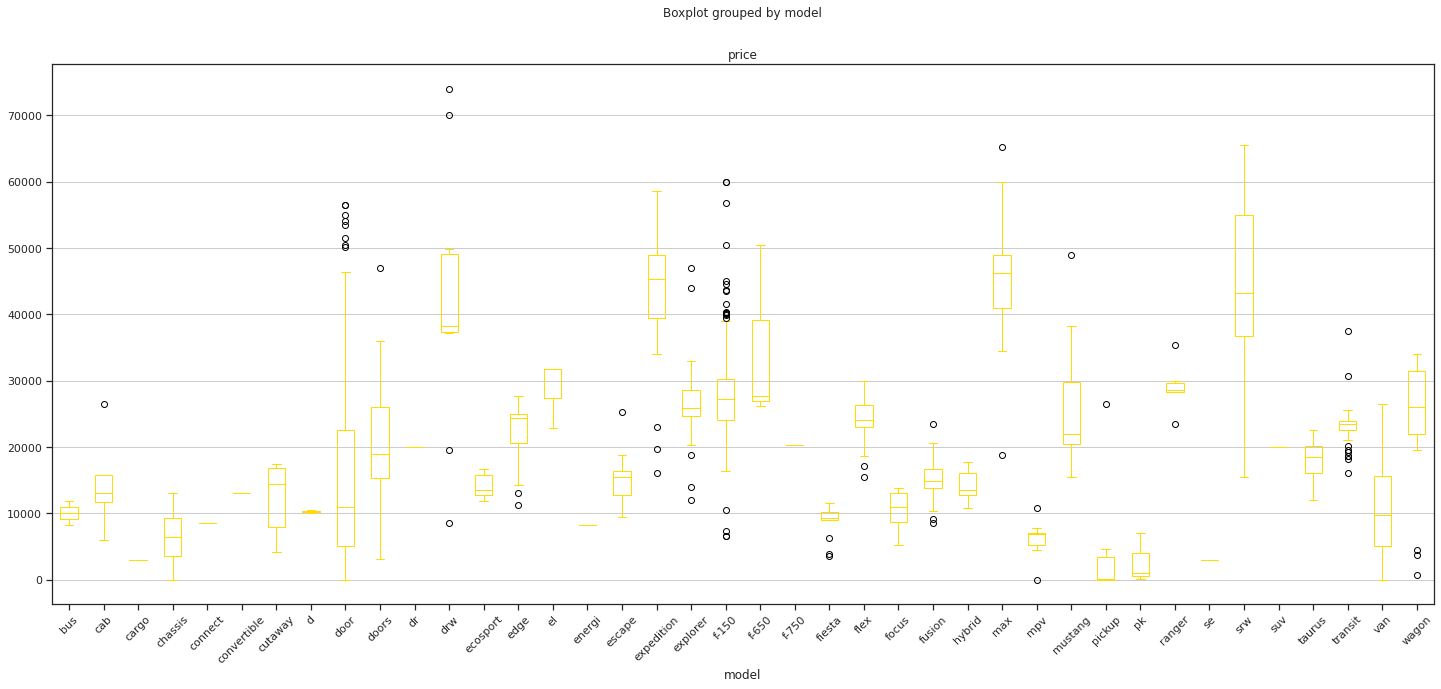

In [0]:
fig, ax = plt.subplots(figsize=(24,10))

filt_df.boxplot(column='price',by='model',ax=ax,color='#ffda03',rot=45,return_type='dict');
ax.grid(axis='x');

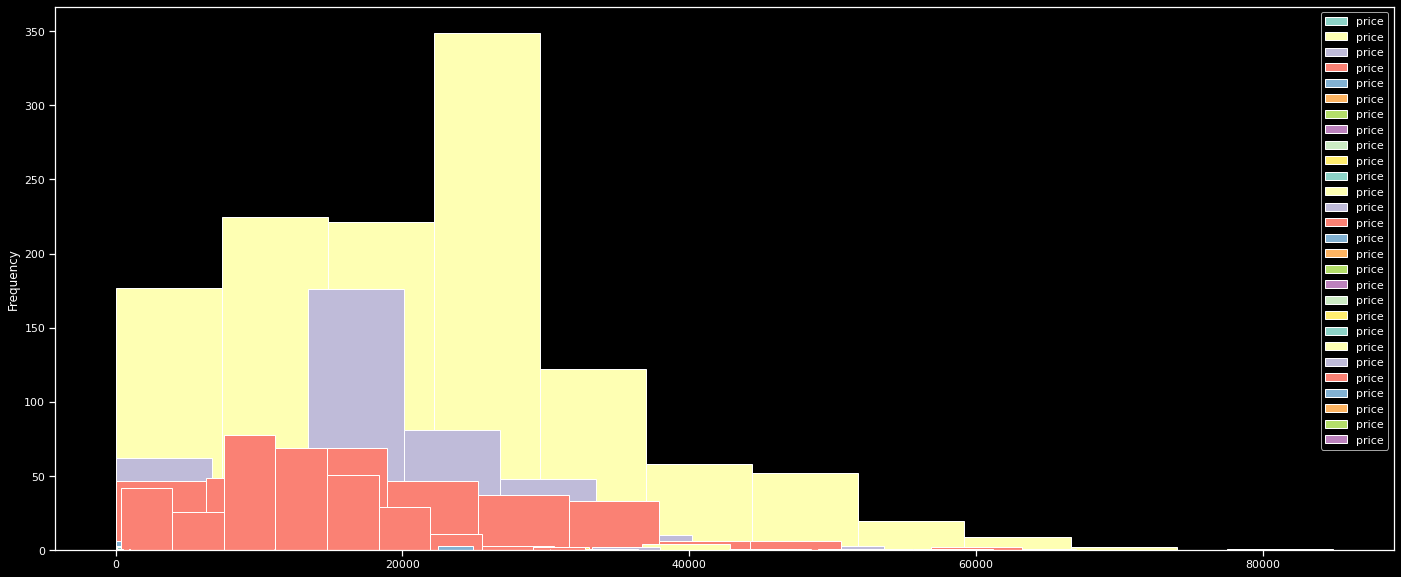

In [0]:
fig, ax = plt.subplots(figsize=(24,10))

for bnd in brand_unq:
  df_c['price'][df_c['brand'] == bnd].plot(kind='hist',legend=True,ax=ax)
  